In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [129]:
X = np.array( [[1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [130]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [131]:
def standardization(z):
    return (z - z.mean(axis=0)) / z.std(axis=0)

In [132]:
#sklern.StandartScaler() #Стандартизайия
#sklern.MinMaxScaler() #Нормализация

In [133]:
X_st = standardization(X.T)

In [134]:
ones = np.ones((len(X_st),))
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [135]:
X_st= np.row_stack((ones, X_st.T))
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [136]:
# SGD

In [145]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [146]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [147]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.86652884  5.52536331  3.90856643  2.90906919] 88.88494730268947
200 [55.48765244  5.64556606  3.14268117  3.61907742] 28.165883354120247
300 [56.36574292  5.74818168  2.50195043  4.17681309] 26.38055979607531
400 [56.48219489  5.84028054  1.97692232  4.62603758] 25.872979919709017
500 [56.49763869  5.92004756  1.54746301  4.98926744] 25.547800220141553
600 [56.49968684  5.98765976  1.19656892  5.28372541] 25.331983284192596
700 [56.49995847  6.04420352  0.91008303  5.52285556] 25.188593816444207
800 [56.49999449  6.09108441  0.67630167  5.71728864] 25.093317076403043
900 [56.49999927  6.12973516  0.48559426  5.87550929] 25.030007530192762
1000 [56.4999999   6.161482    0.33006053  6.00433388] 24.987939013768642


array([56.4999999 ,  6.161482  ,  0.33006053,  6.00433388])

In [148]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [149]:
eval_sgd_model(X_st, y, iterations=10000, qty_in_batch=5, alpha=1e-2)

1000 [56.50236216  6.1792197   0.26509073  6.07016856] 26.603018382936476
2000 [56.50215302  6.2955465  -0.27902576  6.51497982] 24.649711618211935
3000 [56.50212624  6.31004927 -0.34934716  6.57297528] 24.40197635851026
4000 [56.50212277  6.31192692 -0.35845832  6.58049077] 24.36997399628664
5000 [56.50212232  6.31217021 -0.35963887  6.58146457] 24.365829054687786
6000 [56.50212226  6.31220173 -0.35979183  6.58159074] 24.36529201695758
7000 [56.50212225  6.31220582 -0.35981165  6.58160709] 24.36522243275461
8000 [56.50212225  6.31220635 -0.35981422  6.58160921] 24.36521341664797
9000 [56.50212225  6.31220641 -0.35981455  6.58160948] 24.3652122484197
10000 [56.50212225  6.31220642 -0.35981459  6.58160952] 24.365212097050783


array([56.50212225,  6.31220642, -0.35981459,  6.58160952])

In [150]:
# L1 регуляризация - Lasso

In [151]:
#f(x, W) + (lambda_/2) * np.sum(np.abs(W))

In [152]:
# L2 регуляризация - Ridge

In [153]:
#f(x, W) + (lambda_/2) * np.sum(W**2)

In [154]:
#df/dw1 = d(w1**2 + w2**2 + w3**2) / dw1 = 2*w1 + 0 + 0 = 2*w1

In [155]:
#f'(x, W) + lambda_ * np.sum(W)

In [233]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, flpr=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        W_old = np.copy(W)
        y_pred = np.dot(W_old, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W_old) 
        if i % (iterations / 10) == 0:
            if flpr:
                print(i, W, err)
        #print(np.sum((W-W_old)**2))
        #if np.sum((W-W_old)**2)<lambda_:
         #   break
        #print(abs(err_old-err))
       # if np.sum((W-W_old)**2)<1e-8:
        #    print('*'*25)
       #     print('lambda=',lambda_) 
       #     print('iter=',i, ',W=', W, 'err=', err)
       #     break
    return W

In [234]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4, flpr=True)

500 [56.49487895  5.89947315  1.04054601  5.5270874 ] 25.23755832331096
1000 [56.49717505  6.19501568  0.13564839  6.17098435] 24.947089650389493
1500 [56.49717514  6.26565597 -0.17868956  6.42516923] 24.910200887020064
2000 [56.49717514  6.28924463 -0.29120292  6.51776763] 24.905377672807827
2500 [56.49717514  6.29763759 -0.33165155  6.55113988] 24.904735047224676
3000 [56.49717514  6.30065228 -0.3462019   6.56314895] 24.904645262343745
3500 [56.49717514  6.3017366  -0.35143648  6.56746949] 24.904631263168568
4000 [56.49717514  6.30212668 -0.35331967  6.56902387] 24.904628595590758
4500 [56.49717514  6.30226702 -0.35399717  6.56958307] 24.904627942486606
5000 [56.49717514  6.30231751 -0.35424091  6.56978425] 24.904627747206018


array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [236]:
Nl=10
start_lambda = 1
res = np.zeros((5,Nl))
for i in range(0,Nl):
    print('*'*25)
    lambda_ = start_lambda/10**i
    t = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_, flpr=True)
    print('W=', t)
    res[4][i] = lambda_
    res[0][i]=t[0]
    res[1][i]=t[1]
    res[2][i]=t[2]
    res[3][i]=t[3]


*************************
500 [37.66665763  4.01081477  2.67423794  3.68717427] 385.46505506599726
1000 [37.66666667  4.01145633  2.67325056  3.68757284] 385.4632813580281
1500 [37.66666667  4.01145689  2.67324854  3.68757437] 385.4632788348622
2000 [37.66666667  4.01145689  2.67324854  3.68757438] 385.46327882921975
2500 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
3000 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
3500 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
4000 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
4500 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
5000 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
W= [37.66666667  4.01145689  2.67324854  3.68757438]
*************************
500 [53.80821107  5.55425006  1.53274869  5.12255487] 32.85607708560639
1000 [53.80952378  5.70466966  1.09946397  5.42237988] 32.59016846471511
1500 [53.80952381  

### Задание 1.
Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

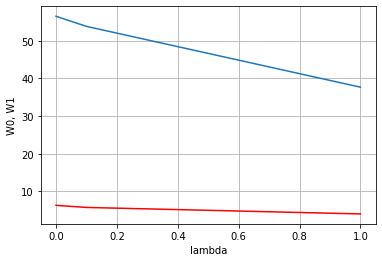

In [237]:
import matplotlib.pyplot as plt

plt.plot(res[:][4], res[:][0])
plt.plot(res[:][4], res[:][1], c='red')
plt.xlabel('lambda')
plt.ylabel('W0, W1')
plt.grid(True)
plt.show()

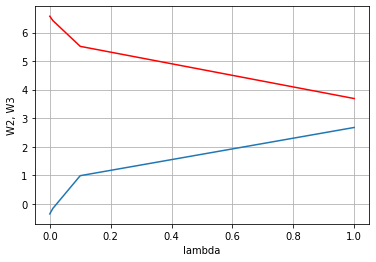

In [238]:
import matplotlib.pyplot as plt


plt.plot(res[:][4], res[:][2])
plt.plot(res[:][4], res[:][3], c='red')
plt.xlabel('lambda')
plt.ylabel('W2, W3')
plt.grid(True)
plt.show()

## 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет, одновременно делать стандартизацию и нормализацию смысла нет. Оба подхода делают одно и то же, но делают это немного по-разному.

## 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [257]:
def eval_model_reg_L1(X, y, iterations, alpha=1e-4, lambda_=1e-8, flpr=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err = 1
    for i in range(1, iterations+1):
        W_old = np.copy(W)
        y_pred = np.dot(W_old, X)
        err_old = err
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W_old))
        if i % 100 == 0:
            if flpr:
                print(i, W, err)
        #print(np.sum((W-W_old)**2))
        #if np.sum((W-W_old)**2)<lambda_:
         #   break
        #print(abs(err_old-err))
        if np.sum((W-W_old)**2)<1e-8:
            print('*'*25)
            print('lambda=',lambda_) 
            print('iter=',i, ',W=', W, 'err=', err,', step=',alpha )
            break
    return W

In [258]:
eval_model_reg_L1(X_st, y, iterations=10000, alpha=1e-2, lambda_=1e-4, flpr=True)

100 [49.07282573  4.33534179  3.11544612  4.84688774] 84.79267138779288
200 [55.51496808  5.05803012  2.37858115  4.96027298] 27.262223151382546
300 [56.36932213  5.47930795  1.81310511  5.1374563 ] 25.732547770763755
400 [56.48262619  5.7370157   1.37898535  5.33591303] 25.417350201986523
500 [56.49765252  5.89983016  1.03995035  5.52753399] 25.23723048428871
600 [56.49964531  6.00647194  0.77177228  5.70020668] 25.123231232996492
700 [56.49990959  6.07901171  0.55768297  5.85005203] 25.049154487124976
800 [56.49994464  6.1302024   0.38565901  5.9772161 ] 25.00043982712213
900 [56.49994929  6.16754916  0.24680736  6.08364349] 24.968224053651003
1000 [56.49994991  6.19557479  0.13437972  6.1719267 ] 24.946863925110584
1100 [5.64999500e+01 6.21708595e+00 4.31516180e-02 6.24473494e+00] 24.932684514488546
1200 [ 5.64999500e+01  6.23386982e+00 -3.09168861e-02  6.30453282e+00] 24.92327217976064
1300 [56.49995     6.24711422 -0.09111651  6.3534868 ] 24.917023342459753
1400 [56.49995     6.25

array([56.49995   ,  6.29518912, -0.31862549,  6.54036715])

In [259]:
Nl=10
start_lambda = 1
res = np.zeros((5,Nl))
for i in range(0,Nl):
    print('*'*25)
    lambda_ = start_lambda/10**i
    t = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_, flpr=True)
    print('W=', t)
    res[4][i] = lambda_
    res[0][i]=t[0]
    res[1][i]=t[1]
    res[2][i]=t[2]
    res[3][i]=t[3]

*************************
500 [37.66665763  4.01081477  2.67423794  3.68717427] 385.46505506599726
1000 [37.66666667  4.01145633  2.67325056  3.68757284] 385.4632813580281
1500 [37.66666667  4.01145689  2.67324854  3.68757437] 385.4632788348622
2000 [37.66666667  4.01145689  2.67324854  3.68757438] 385.46327882921975
2500 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
3000 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
3500 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
4000 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
4500 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
5000 [37.66666667  4.01145689  2.67324854  3.68757438] 385.4632788292066
W= [37.66666667  4.01145689  2.67324854  3.68757438]
*************************
500 [53.80821107  5.55425006  1.53274869  5.12255487] 32.85607708560639
1000 [53.80952378  5.70466966  1.09946397  5.42237988] 32.59016846471511
1500 [53.80952381  

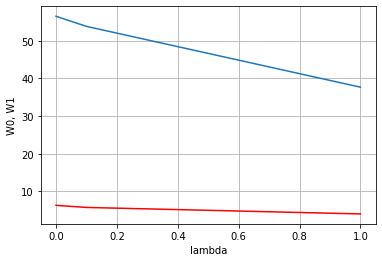

In [260]:
import matplotlib.pyplot as plt

plt.plot(res[:][4], res[:][0])
plt.plot(res[:][4], res[:][1], c='red')
plt.xlabel('lambda')
plt.ylabel('W0, W1')
plt.grid(True)
plt.show()

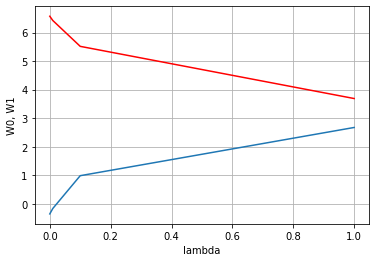

In [261]:
import matplotlib.pyplot as plt

plt.plot(res[:][4], res[:][2])
plt.plot(res[:][4], res[:][3], c='red')
plt.xlabel('lambda')
plt.ylabel('W0, W1')
plt.grid(True)
plt.show()

In [262]:
from sklearn.linear_model import LinearRegression

In [263]:
res = np.zeros((10,4))
for i in range(X_st.shape[1]):
    res[i][0]=X_st[0][i]
    res[i][1]=X_st[1][i]
    res[i][2]=X_st[2][i]
    res[i][3]=X_st[3][i]

In [264]:
reg = LinearRegression().fit(res, y)
reg.score(res, y)

0.8445889617665624

In [265]:
reg.coef_

array([ 0.        ,  6.30309349, -0.35638885,  6.57147643])

In [266]:
reg.intercept_

56.5

In [267]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1)
clf.fit(res, y)
Ridge()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [268]:
c= clf.predict(res)

In [269]:
calc_mse(y, c)

25.877207055286988